## Extract Transform and Load the Data set.

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

reviews_df = pd.read_csv("Reviews.csv")

#Only keep reviews with a non-zero helpfulness rating.
reviews_df = reviews_df[reviews_df["HelpfulnessNumerator"] > 0]

#Compute the length of each review and delete all reviews that are longer than 512 characters.
reviews_df['ReviewLength'] = list(map(len, reviews_df['Text']))
reviews_df = reviews_df[reviews_df["ReviewLength"] <= 512]

#Drop all unnecessary columns.
reviews_df.drop(columns=["ProductId", "ProfileName", "HelpfulnessDenominator", "Time", "Summary"], inplace=True)

#Determine how many reviews correspond to each UserId.
review_counts = reviews_df["UserId"].value_counts()
review_count_df = review_counts.to_frame()
review_count_df.rename(columns={"count":"ReviewCount"}, inplace=True)

#Only keep reviews by users with atleast 20 reviews.
reviews_df.set_index("UserId", inplace=True)
reviews_df = reviews_df.join(review_count_df, how="outer")
reviews_df = reviews_df[reviews_df["ReviewCount"] >=20]

#Only keep reviews where the HelpfulnessNumerator <= 5.
reviews_df = reviews_df[reviews_df["HelpfulnessNumerator"] <= 5]

print(reviews_df.shape)
reviews_df.head()

(6818, 6)


,Id,HelpfulnessNumerator,Score,Text,ReviewLength,ReviewCount
UserId,,,,,,
A106ZCP7RSXMRU,19034,1,5,We like the regular Little Bear cheese puffs s...,331,40
A106ZCP7RSXMRU,62479,1,4,"Gorilla Munch tastes a lot like Cap'n Crunch, ...",378,40
A106ZCP7RSXMRU,74434,2,5,We love Garden of Eatin' chips. Our favorites ...,246,40
A106ZCP7RSXMRU,74472,2,5,We only buy organic natural foods without any ...,426,40
A106ZCP7RSXMRU,94442,2,5,We love Garden of Eatin' chips. Our favorites ...,246,40


## Sentiment Analysis

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import pipeline
from scipy.special import softmax

#Roberta Sentiment Analysis Model.
sentiment_analysis_pipeline = pipeline('sentiment-analysis')

#Determine the sentiment label and score for each review.
sentiment_objects = list(map(sentiment_analysis_pipeline, reviews_df['Text']))
sentiment_labels = [obj[0]['label'] for obj in sentiment_objects]
sentiment_confidence = [obj[0]['score'] for obj in sentiment_objects]

#Append the sentimetn scores and labels to the dataframe.
reviews_df["SentimentLabels"] = sentiment_labels
reviews_df["SentimentConfidence"] = sentiment_confidence

#Save the new dataframe as a csv file.
reviews_df.to_csv("transformed_reviews.csv", header=True, index=True)

reviews_df.head()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,Id,HelpfulnessNumerator,Score,Text,ReviewLength,ReviewCount,SentimentLabels,SentimentConfidence
UserId,,,,,,,,
A106ZCP7RSXMRU,19034,1,5,We like the regular Little Bear cheese puffs s...,331,40,POSITIVE,0.999824
A106ZCP7RSXMRU,62479,1,4,"Gorilla Munch tastes a lot like Cap'n Crunch, ...",378,40,POSITIVE,0.997502
A106ZCP7RSXMRU,74434,2,5,We love Garden of Eatin' chips. Our favorites ...,246,40,POSITIVE,0.999241
A106ZCP7RSXMRU,74472,2,5,We only buy organic natural foods without any ...,426,40,POSITIVE,0.995697
A106ZCP7RSXMRU,94442,2,5,We love Garden of Eatin' chips. Our favorites ...,246,40,POSITIVE,0.999241


## Data Visualization

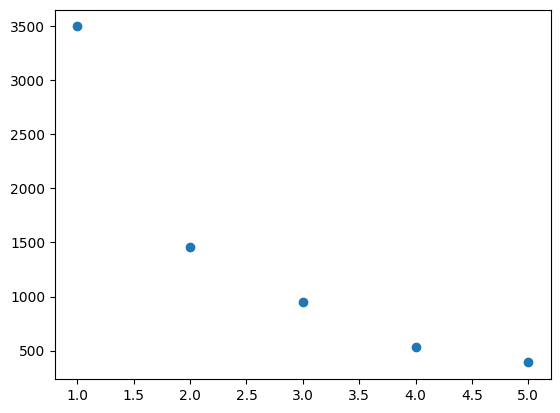

In [23]:
data_df = pd.read_csv("transformed_reviews.csv")
#print(data_df.shape)
#plt.hist(data_df["SentimentLabels"])

num_counts = data_df.groupby(by="HelpfulnessNumerator").agg({"HelpfulnessNumerator":"count"})
#print(num_counts)
plt.scatter(num_counts.index, num_counts["HelpfulnessNumerator"])
#plt.xlim(1,5)